#### Implementing Boosting (XGBOOST) Algorithm

In [6]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier                             
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

#### 1. Data Importing

In [7]:
# Load the dataset
df = pd.read_csv("User_Data_2.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,MaritalStatus,EducationLevel,EmploymentStatus,CreditScore,LoanAmount,NumOfDependents,HomeOwnership,MobileBankingUsage,AnnualExpenses,InternetUsagePerDay,Purchased
0,100000,Male,45,98353,Single,High School,Student,689,25564,1,Own,0,24708,3.42,0
1,100001,Female,24,51406,Divorced,PhD,Retired,687,43013,4,Mortgage,1,31138,4.14,0
2,100002,Male,52,108992,Divorced,PhD,Unemployed,394,20225,1,Rent,1,22928,4.95,1
3,100003,Male,45,71428,Single,Bachelor,Employed,729,39484,2,Rent,0,27235,6.42,0
4,100004,Male,31,43777,Divorced,High School,Employed,336,20946,0,Own,1,49189,6.87,0


#### 2. Data Exploration

In [8]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

Shape: (4000, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User ID              4000 non-null   int64  
 1   Gender               4000 non-null   object 
 2   Age                  4000 non-null   int64  
 3   EstimatedSalary      4000 non-null   int64  
 4   MaritalStatus        4000 non-null   object 
 5   EducationLevel       4000 non-null   object 
 6   EmploymentStatus     4000 non-null   object 
 7   CreditScore          4000 non-null   int64  
 8   LoanAmount           4000 non-null   int64  
 9   NumOfDependents      4000 non-null   int64  
 10  HomeOwnership        4000 non-null   object 
 11  MobileBankingUsage   4000 non-null   int64  
 12  AnnualExpenses       4000 non-null   int64  
 13  InternetUsagePerDay  4000 non-null   float64
 14  Purchased            4000 non-null   int64  
dtypes: float64(1)

In [9]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
User ID                0
Gender                 0
Age                    0
EstimatedSalary        0
MaritalStatus          0
EducationLevel         0
EmploymentStatus       0
CreditScore            0
LoanAmount             0
NumOfDependents        0
HomeOwnership          0
MobileBankingUsage     0
AnnualExpenses         0
InternetUsagePerDay    0
Purchased              0
dtype: int64


In [10]:
print("\nTarget distribution:")
print(df['Purchased'].value_counts())


Target distribution:
Purchased
1    3042
0     958
Name: count, dtype: int64


In [11]:
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,User ID,Age,EstimatedSalary,CreditScore,LoanAmount,NumOfDependents,MobileBankingUsage,AnnualExpenses,InternetUsagePerDay,Purchased
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,101999.500000,38.50025,85247.492750,577.568250,25139.072000,2.037000,0.519750,36746.317750,4.219415,0.760500
std,1154.844867,11.93820,37663.571188,159.661479,14201.121395,1.412137,0.499672,18952.833813,2.157122,0.426832
min,100000.000000,18.00000,20002.000000,300.000000,1028.000000,0.000000,0.000000,5031.000000,0.500000,0.000000
25%,100999.750000,28.00000,52365.500000,437.000000,12725.750000,1.000000,0.000000,20445.500000,2.350000,1.000000
50%,101999.500000,38.00000,86194.500000,583.000000,24678.000000,2.000000,1.000000,36067.500000,4.200000,1.000000
75%,102999.250000,49.00000,118592.250000,712.000000,37508.250000,3.000000,1.000000,53283.500000,6.082500,1.000000
max,103999.000000,59.00000,149999.000000,849.000000,49998.000000,4.000000,1.000000,69970.000000,7.990000,1.000000


#### 3. Data Preprocessing

In [12]:
# Drop 'User ID' since it's irrelevant for modeling
df.drop('User ID', axis=1, inplace=True)

# Ensure target column is integer
df['Purchased'] = df['Purchased'].astype(int)

#### Encode Categorical Variables

In [13]:
# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
# Copy the dataset to avoid modifying the original directly
encoded_df = df.copy()
# Identify categorical columns
categorical_cols = encoded_df.select_dtypes(include='object').columns
print("Categorical columns to encode:", list(categorical_cols))
# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    encoded_df[col] = le.fit_transform(encoded_df[col])
# Show the encoded DataFrame
print("\nEncoded DataFrame:")
encoded_df.head()

Categorical columns to encode: ['Gender', 'MaritalStatus', 'EducationLevel', 'EmploymentStatus', 'HomeOwnership']

Encoded DataFrame:


,Gender,Age,EstimatedSalary,MaritalStatus,EducationLevel,EmploymentStatus,CreditScore,LoanAmount,NumOfDependents,HomeOwnership,MobileBankingUsage,AnnualExpenses,InternetUsagePerDay,Purchased
0,1,45,98353,2,1,2,689,25564,1,1,0,24708,3.42,0
1,0,24,51406,0,3,1,687,43013,4,0,1,31138,4.14,0
2,1,52,108992,0,3,3,394,20225,1,2,1,22928,4.95,1
3,1,45,71428,2,0,0,729,39484,2,2,0,27235,6.42,0
4,1,31,43777,0,1,0,336,20946,0,1,1,49189,6.87,0


#### Data Spliting (Dependent and Independent Variables)

In [14]:
# Define target variable
y = encoded_df['Purchased']

# Define feature set (drop the target column)
X = encoded_df.drop('Purchased', axis=1)

In [15]:
# Display the shape of X and y
print("Shape of Independent Variables:", X.shape)
print("Shape of Target variable shape:", y.shape)

Shape of Independent Variables: (4000, 13)
Shape of Target variable shape: (4000,)


In [16]:
# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Copy the dataset to avoid modifying the original directly
encoded_df = df.copy()

# Identify categorical columns
categorical_cols = encoded_df.select_dtypes(include='object').columns
print("Categorical columns to encode:", list(categorical_cols))

# Dictionary to store LabelEncoders for each column
label_encoders = {}

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le  # Save encoder
    print(f"\nEncoding for '{col}':")
    for idx, label in enumerate(le.classes_):
        print(f"  {idx} -> {label}")

Categorical columns to encode: ['Gender', 'MaritalStatus', 'EducationLevel', 'EmploymentStatus', 'HomeOwnership']

Encoding for 'Gender':
  0 -> Female
  1 -> Male

Encoding for 'MaritalStatus':
  0 -> Divorced
  1 -> Married
  2 -> Single

Encoding for 'EducationLevel':
  0 -> Bachelor
  1 -> High School
  2 -> Master
  3 -> PhD

Encoding for 'EmploymentStatus':
  0 -> Employed
  1 -> Retired
  2 -> Student
  3 -> Unemployed

Encoding for 'HomeOwnership':
  0 -> Mortgage
  1 -> Own
  2 -> Rent


In [17]:
# Show the encoded DataFrame
print("\nEncoded DataFrame:")
encoded_df.head()


Encoded DataFrame:


,Gender,Age,EstimatedSalary,MaritalStatus,EducationLevel,EmploymentStatus,CreditScore,LoanAmount,NumOfDependents,HomeOwnership,MobileBankingUsage,AnnualExpenses,InternetUsagePerDay,Purchased
0,1,45,98353,2,1,2,689,25564,1,1,0,24708,3.42,0
1,0,24,51406,0,3,1,687,43013,4,0,1,31138,4.14,0
2,1,52,108992,0,3,3,394,20225,1,2,1,22928,4.95,1
3,1,45,71428,2,0,0,729,39484,2,2,0,27235,6.42,0
4,1,31,43777,0,1,0,336,20946,0,1,1,49189,6.87,0


In [18]:
print("\nTarget (y):")
y.head(5)


Target (y):


0    0
1    0
2    1
3    0
4    0
Name: Purchased, dtype: int64

#### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the features
X_scaled = scaler.fit_transform(X)
# Optional: Convert back to a DataFrame to keep feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
# Display the scaled features
print("Scaled Feature Set:")
X_scaled_df.head()

Scaled Feature Set:


,Gender,Age,EstimatedSalary,MaritalStatus,EducationLevel,EmploymentStatus,CreditScore,LoanAmount,NumOfDependents,HomeOwnership,MobileBankingUsage,AnnualExpenses,InternetUsagePerDay
0,1.003506,0.544518,0.348006,1.240746,-0.456067,0.422060,0.698012,0.029926,-0.734440,-0.003350,-1.040312,-0.635252,-0.370640
1,-0.996506,-1.214761,-0.898633,-1.221662,1.338589,-0.469773,0.685484,1.258785,1.390266,-1.221647,0.961250,-0.295946,-0.036820
2,1.003506,1.130944,0.630516,-1.221662,1.338589,1.313892,-1.149878,-0.346077,-0.734440,1.214946,0.961250,-0.729181,0.338727
3,1.003506,0.544518,-0.366965,1.240746,-1.353395,-1.361605,0.948574,1.010253,-0.026205,1.214946,-1.040312,-0.501904,1.020276
4,1.003506,-0.628335,-1.101215,-1.221662,-0.456067,-1.361605,-1.513192,-0.295300,-1.442675,-0.003350,0.961250,0.656590,1.228914


#### Feature Selection Methods for XGBOOST (RFE + Random forest)

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # ✅ Use Random Forest instead of Decision Tree

# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

# Initialize RFE with number of features to select, e.g., 8
rfe = RFE(estimator=model, n_features_to_select=8)

# Fit RFE (you can use X instead of X_scaled, since RF doesn't require scaling)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'EstimatedSalary', 'EmploymentStatus', 'CreditScore',
       'LoanAmount', 'NumOfDependents', 'AnnualExpenses',
       'InternetUsagePerDay'],
      dtype='object')


#### Using Feature Importance from Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Fit Random Forest model on the data (no need to scale)
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances directly from the model
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Sort by importance
feature_importance = feature_importance.sort_values(ascending=False)
print("Feature Importance (from Random Forest):")
print(feature_importance)

# Select top 8 features
top_features = feature_importance.head(8).index.tolist()
print("\nTop 8 features:")
print(top_features)

Feature Importance (from Random Forest):
EstimatedSalary        0.276668
Age                    0.128706
CreditScore            0.103163
AnnualExpenses         0.102089
InternetUsagePerDay    0.101958
LoanAmount             0.101180
NumOfDependents        0.038034
EmploymentStatus       0.034105
EducationLevel         0.033047
MaritalStatus          0.025739
HomeOwnership          0.024522
MobileBankingUsage     0.016194
Gender                 0.014594
dtype: float64

Top 8 features:
['EstimatedSalary', 'Age', 'CreditScore', 'AnnualExpenses', 'InternetUsagePerDay', 'LoanAmount', 'NumOfDependents', 'EmploymentStatus']


#### Selecting Best 8 Features.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Step 1: Fit Random Forest on the original data (no scaling needed here)
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Step 2: Get feature importances from Random Forest
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Step 3: Sort by importance
feature_importance = feature_importance.sort_values(ascending=False)
print("Feature Importance (from Random Forest):")
print(feature_importance)

# Step 4: Select top 8 features based on importance
top_features = feature_importance.head(8).index.tolist()
print("\nTop 8 features:")
print(top_features)

# Step 5: Create a new DataFrame with selected features and target
selected_df = pd.concat([encoded_df[top_features], encoded_df['Purchased']], axis=1)

# Step 6: Apply StandardScaler to the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_df[top_features])

# Step 7: Replace original features with scaled values
selected_df_scaled = pd.DataFrame(scaled_features, columns=top_features)
selected_df_scaled['Purchased'] = selected_df['Purchased'].values  # Add the target column

# Step 8: Save to CSV
selected_file_path = "selected_features_scaled_dataset_RF.csv"
selected_df_scaled.to_csv(selected_file_path, index=False)

print(f"Scaled dataset with selected features saved to: {selected_file_path}")

# Step 9: Display the head of the final scaled DataFrame
selected_df_scaled.head()

Feature Importance (from Random Forest):
EstimatedSalary        0.276668
Age                    0.128706
CreditScore            0.103163
AnnualExpenses         0.102089
InternetUsagePerDay    0.101958
LoanAmount             0.101180
NumOfDependents        0.038034
EmploymentStatus       0.034105
EducationLevel         0.033047
MaritalStatus          0.025739
HomeOwnership          0.024522
MobileBankingUsage     0.016194
Gender                 0.014594
dtype: float64

Top 8 features:
['EstimatedSalary', 'Age', 'CreditScore', 'AnnualExpenses', 'InternetUsagePerDay', 'LoanAmount', 'NumOfDependents', 'EmploymentStatus']
Scaled dataset with selected features saved to: selected_features_scaled_dataset_RF.csv


,EstimatedSalary,Age,CreditScore,AnnualExpenses,InternetUsagePerDay,LoanAmount,NumOfDependents,EmploymentStatus,Purchased
0,0.348006,0.544518,0.698012,-0.635252,-0.370640,0.029926,-0.734440,0.422060,0
1,-0.898633,-1.214761,0.685484,-0.295946,-0.036820,1.258785,1.390266,-0.469773,0
2,0.630516,1.130944,-1.149878,-0.729181,0.338727,-0.346077,-0.734440,1.313892,1
3,-0.366965,0.544518,0.948574,-0.501904,1.020276,1.010253,-0.026205,-1.361605,0
4,-1.101215,-0.628335,-1.513192,0.656590,1.228914,-0.295300,-1.442675,-1.361605,0


#### Train Test Split On selected Features

In [23]:
from sklearn.model_selection import train_test_split

# Use only the selected features from scaled DataFrame
X_selected = X_scaled_df[selected_features]

# Perform train-test split on selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape (X_train):", X_train.shape)
print("Training set shape (Y_train):", y_train.shape)
print("Test set shape(X_test):", X_test.shape)
print("Test set shape(Y_test):", y_test.shape)

Training set shape (X_train): (3200, 8)
Training set shape (Y_train): (3200,)
Test set shape(X_test): (800, 8)
Test set shape(Y_test): (800,)


In [24]:
X_train.head()

,Age,EstimatedSalary,EmploymentStatus,CreditScore,LoanAmount,NumOfDependents,AnnualExpenses,InternetUsagePerDay
3357,-0.209459,1.305629,-0.469773,-1.187462,-0.429814,0.682031,-0.916723,-0.523640
553,0.125642,1.508769,-0.469773,-1.682321,-1.414648,-0.026205,1.138003,-1.117098
479,0.795843,-1.447189,0.422060,-1.262630,0.866162,-0.734440,1.504748,-0.973370
207,-0.293234,-1.329023,0.422060,0.553940,-0.175647,-0.734440,-0.157322,-1.080007
3220,1.382270,0.937827,-1.361605,-0.047408,0.676716,-0.734440,0.766086,0.913639


#### 4. Boosting with XGBoost (XGBClassifier)

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize XGBClassifier with appropriate parameters
xgb_model = XGBClassifier(
    max_depth=5,
    learning_rate=1.0,
    n_estimators=50,
    subsample=1.0,
    colsample_bytree=1.0,
    eval_metric='logloss',     # Still needed to avoid defaulting to multi-class metrics
    random_state=42
)
# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.7525


In [26]:
# Predict on training set
y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9975


In [27]:
# Predict on test set
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Testing Accuracy: 0.7525


#### Hyperparameter Tuning

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [40, 50, 80],       # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],             # Maximum tree depth for base learners
    'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage
    'subsample': [0.8, 1.0],            # Fraction of samples used for fitting trees
    'colsample_bytree': [0.8, 1.0],     # Fraction of features used for each tree
}

# Initialize XGBoost model with evaluation metric only (no deprecated params)
xgb_base = XGBClassifier(
    eval_metric='logloss',     # Avoid default multi-class metrics warning
    random_state=42            # For reproducibility
)

# Set up GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(
    estimator=xgb_base,        # Base model
    param_grid=param_grid,     # Hyperparameter grid
    scoring='accuracy',        # Evaluation metric
    cv=5,                      # 5-fold cross-validation
    verbose=1,                 # Display training progress
    n_jobs=-1                  # Use all available CPU cores
)

# Fit the model to the training data with all parameter combinations
grid_search.fit(X_train, y_train)
# Retrieve the best performing model
best_xgb_model = grid_search.best_estimator_
# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)
# Evaluate the model's performance
print("Best Parameters:", grid_search.best_params_)           # Show best hyperparameters
print("Test Accuracy:", accuracy_score(y_test, y_pred))       # Show test accuracy

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40, 'subsample': 0.8}
Test Accuracy: 0.81375


#### Re-Train the Model

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Best Parameters obtained from GridSearchCV
best_params = {
    'colsample_bytree': 0.8,     # Fraction of features to consider per tree
    'learning_rate': 0.1,        # Step size shrinkage to prevent overfitting
    'max_depth': 3,              # Maximum depth of individual trees
    'n_estimators': 50,          # Number of boosting rounds (trees)
    'subsample': 1.0             # Fraction of training data to use per tree
}

# ✅ Initialize the XGBoost model with the best hyperparameters
xgb_model = XGBClassifier(
    colsample_bytree=best_params['colsample_bytree'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    eval_metric='logloss',      # Set evaluation metric explicitly to avoid warnings
    random_state=42             # For reproducibility
)

#Train the XGBoost model on the training set
xgb_model.fit(X_train, y_train)

#Predict the class labels for the test set
y_pred = xgb_model.predict(X_test)

# Print overall accuracy score
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.80625


In [30]:
# Predict on training set
y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.8169


In [31]:
# Predict on test set
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Testing Accuracy: 0.8063


#### Classification Report

In [32]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Not Purchased', 'Purchased']))

Classification Report:
               precision    recall  f1-score   support

Not Purchased       0.66      0.40      0.50       192
    Purchased       0.83      0.93      0.88       608

     accuracy                           0.81       800
    macro avg       0.74      0.67      0.69       800
 weighted avg       0.79      0.81      0.79       800



#### Customized Classification report Boosting (XGBOOST)

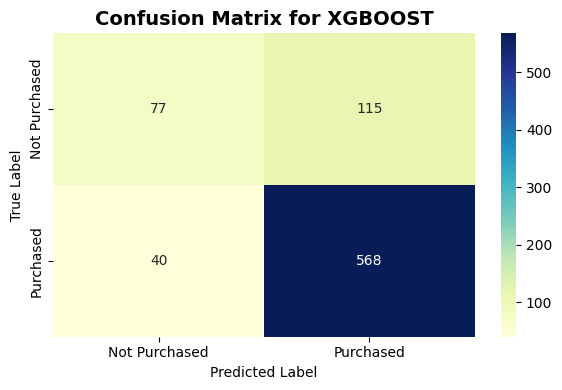

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = ['Not Purchased', 'Purchased']

# Visualize with heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for XGBOOST', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Training vs Testing Accuracy Result

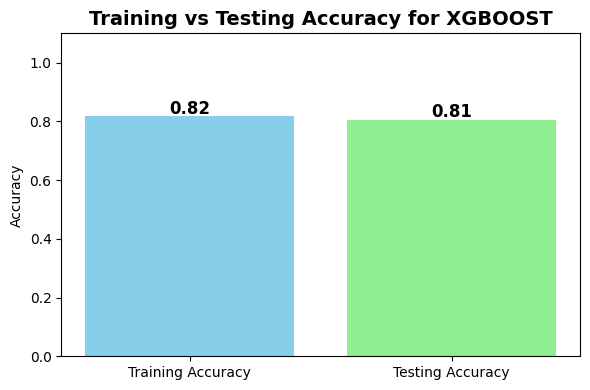

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Compute accuracy values for Decision Tree model
train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
test_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['skyblue', 'lightgreen'])

# Add value labels on top of bars
for i, acc in enumerate([train_accuracy, test_accuracy]):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', fontsize=12, fontweight='bold')

# Chart formatting
plt.ylim(0, 1.1)
plt.title('Training vs Testing Accuracy for XGBOOST', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

#### Save the model

In [37]:
# Create a dictionary named 'artifacts' to store important objects needed for prediction
artifacts = {
    "model": xgb_model,              # Trained XGBoost classification model
    "scaler": scaler,                # Scaler object used to normalize numeric features during training
    "encoders": label_encoders,     # Dictionary of label encoders for categorical features to transform categories into numeric values
    "features": X_train.columns.tolist()  # List of feature column names used for training the model, preserving order
}

# Save the 'artifacts' dictionary to a file named 'model_artifacts.pkl' using joblib for later use in prediction
joblib.dump(artifacts, "model_artifacts.pkl")


['model_artifacts.pkl']